('coordinate:', array([ 1.,  2.]), 'label:', 2)
('coordinate:', array([ 5.,  8.]), 'label:', 1)
('coordinate:', array([ 1.5,  1.8]), 'label:', 2)
('coordinate:', array([ 8.,  8.]), 'label:', 1)
('coordinate:', array([ 1. ,  0.6]), 'label:', 0)
('coordinate:', array([  9.,  11.]), 'label:', 1)


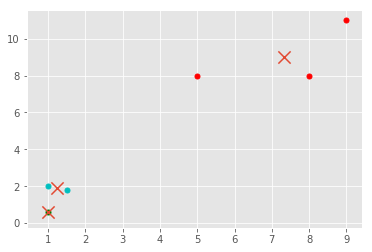

In [148]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

def kmeans(data, k):
    centers = []
    for i in np.arange(k):
        centers.append(data[np.random.randint(0, data.shape[0])])
    centers = np.array(centers)
    labels = np.zeros(data.shape[0])
    unchanged = False
    while not(unchanged):
        prev_labels = labels
        dists = sp.spatial.distance.cdist(data, centers, 'euclidean')
        labels = np.argmin(dists, axis=1)
        unchanged = np.array_equal(labels, prev_labels)
        centers = np.zeros(centers.shape)
        grouped = np.zeros(k)
        
        for i, l in np.ndenumerate(labels):
            centers[l] = centers[l] + data[i]
            grouped[l] += 1
        
        for i in np.arange(k):
            if grouped[i] > 0:
                centers[i] = centers[i] / grouped[i]
            else:
                centers[i] = data[np.random.randint(0, data.shape[0])]
    return labels, centers
    
X = np.array([[1, 2],
          [5, 8],
          [1.5, 1.8],
          [8, 8],
          [1, 0.6],
          [9, 11]])
l, c = kmeans(X, 3)

for i in range(len(X)):
    print("coordinate:",X[i], "label:", l[i])
    plt.plot(X[i][0], X[i][1], colors[l[i]], markersize = 10)
plt.scatter(c[:, 0],c[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()
    

In [344]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sympy.utilities.iterables import generate_bell

iris = datasets.load_iris() 
labels, centers = kmeans(iris.data, 3)

def check_accuracy(K, result, output, logs=False):
    best_acc = 0.
    for it, perm in enumerate(generate_bell(K)):
        correct = 0
        if logs and (it % 1e4 == 0):
            print('Processing permutation no:. ' + str(it))
        for i, l in np.ndenumerate(result):
            if output[i] == perm[l]:
                correct += 1
        best_acc = max(best_acc, 100.0 * correct / result.shape[0])
    print "Best accuracy: %.2f%%" % best_acc 

check_accuracy(3, labels, iris.target)

Best accuracy: 89.33%


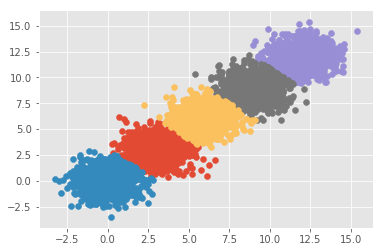

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def test_kmeans(data, k, logs=False):
    d = np.array(data[1])
    r = np.array(data[0])
    labels, _ = kmeans(d, k)
    check_accuracy(k, labels, r, logs)
    
def plot_2d_kmeans(data, k):
#     print(np.array(data[1]))
    labels, centers = kmeans(np.array(data[1]), k)
    colors = cm.rainbow(np.linspace(0, 1, k))
    data = np.array(data[1])
    for group in np.arange(k):
        its = labels == group
        plt.scatter(data[its, 0], data[its, 1])
    plt.show()
        
def generate(d, K, p, m, sigma, N=5000):
    group_num = 0
    points = []
    for pi, mi, si in zip(p, m, sigma):
        for i in np.arange(pi * N):
            points.append((group_num, np.random.multivariate_normal(mi, si)))
        group_num += 1
    random.shuffle(points)
    return zip(*points)
        
d = 2
K = 5
p = [1.0 / K] * K
m = [np.ones(d) * 3. * x for x in np.arange(K)]
s = [np.identity(d)] * K

#### a ####
a = generate(d, K, p, m, s)
plot_2d_kmeans(a, K)
# print a

#### b ####
s = [np.array([[3, 0], [0, 1]])] * K
b = generate(d, K, p, m, s)
# test_kmeans(b, K)
# print b

#### c ####
s = [np.array([[3, 1], [1, 1]])] * K
c = generate(d, K, p, m, s)
# test_kmeans(c, K)
# print c

#### d ####
p = [.2, .1, .3, .1, .3]
dd = generate(d, K, p, m, s)
# test_kmeans(d, K)
# print d

#### e ####
p = [1.0 / K] * K
d = 3
m = [np.ones(d) * 3. * x for x in np.arange(K)]
s = [np.array([[3, 1, 0], [1, 1, 0], [0, 0, 1]])] * K
e = generate(d, K, p, m, s)
# test_kmeans(e, K)

#### f ####        
d = 100
K = 10
p = [1.0 / K] * K
m = [np.ones(d) * 3. * x for x in np.arange(K)]
s = [np.identity(d)] * K
f = generate(d, K, p, m, s)
# test_kmeans(f, K, logs=True)

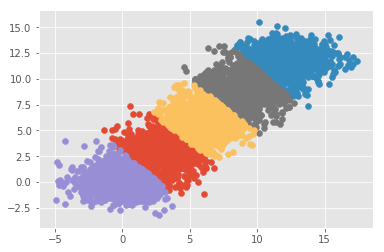

In [372]:
plot_2d_kmeans(b, 5)

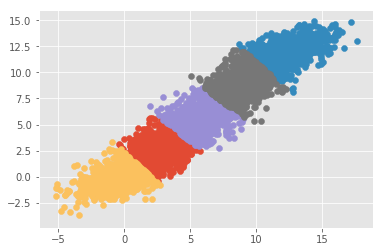

In [373]:
plot_2d_kmeans(c, 5)

In [ ]:
plot_2d_kmeans(dd, 5)

In [304]:
d = int(1e3)
K = int(1e3)
p = [1.0 / K] * K
not_exactly_q = 10.
m = [np.ones(d) * not_exactly_q * x for x in np.arange(K)]
s = [np.identity(d)] * K
N = 1e6
data = generate(d, K, p, m, s, N)
# test_kmeans(data, K)

KeyboardInterrupt: 

In [297]:
import csv

def read_wine(filename):
    with open(filename, 'r') as f:
        data = np.genfromtxt(filename, delimiter=',')
    labels = data[:, 0] - 1
    data = data[:, 1:]
    return labels, data

def read_iris(filename):
    with open(filename, 'r') as f:
        data = np.genfromtxt(filename, delimiter=',')
    data = np.array(data)
    labels = data[:, -1]
    data = data[:, :-1]
    return labels, data   

def read_pokerhand(filename):
    with open(filename, 'r') as f:
        data = np.genfromtxt(filename, delimiter=',')
    data = np.array(data)
    labels = data[:, -1] - 1
    data = data[:, :-1]
    return labels, data  

def read_glass(filename):
    with open(filename, 'r') as f:
        data = np.genfromtxt(filename, delimiter=',')
    data = np.array(data)
    labels = data[:, -1] - 1
    data = data[:, 1:-1]
    return labels, data  

def read_spam(filename):
    with open(filename, 'r') as f:
        data = np.genfromtxt(filename, delimiter=',')
    data = np.array(data)
    labels = data[:, -1]
    data = data[:, :-1]
    return labels, data  

wine = read_wine("/home/ruda/workspace/school/eksplo/list3/wine.csv")
test_kmeans(wine, 3)
iris = read_iris("/home/ruda/workspace/school/eksplo/list3/iris.csv")
test_kmeans(iris, 3)
pokerhand = read_pokerhand("/home/ruda/workspace/school/eksplo/list3/pokerhand.csv")
test_kmeans(pokerhand, 9)
glass = read_glass("/home/ruda/workspace/school/eksplo/list3/glass.csv")
test_kmeans(glass, 7)
spam = read_spam("/home/ruda/workspace/school/eksplo/list3/spam.csv")
test_kmeans(spam, 2)
    

Best accuracy: 70.22%
Best accuracy: 89.33%


KeyboardInterrupt: 

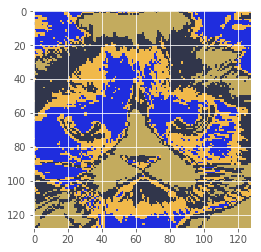

In [337]:
import scipy

def read_img(filename):
    return scipy.misc.imread(filename)

def simplify_picture(picture, colors):
    shape = picture.shape
    flat = picture.reshape((-1, 3))
    labels, centers = kmeans(flat, colors)
    new_picture = np.array(map(lambda x: centers[x], labels))
    new_picture = new_picture.reshape(shape)
    return new_picture

grumpy = read_img("/home/ruda/workspace/school/eksplo/list3/grumpy-small.png")
simplified = simplify_picture(grumpy, 4)
plt.imshow(simplified)
plt.show()

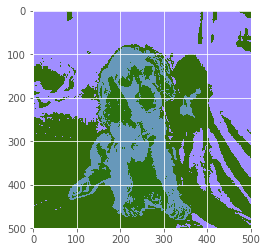

In [332]:
pic = read_img("/home/ruda/workspace/school/eksplo/list3/dog.jpg")
simplified = simplify_picture(pic, 4)
plt.imshow(simplified)
plt.show()

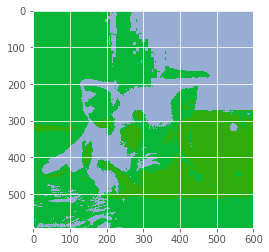

In [334]:
pic = read_img("/home/ruda/workspace/school/eksplo/list3/pig1.jpg")
simplified = simplify_picture(pic, 3)
plt.imshow(simplified)
plt.show()

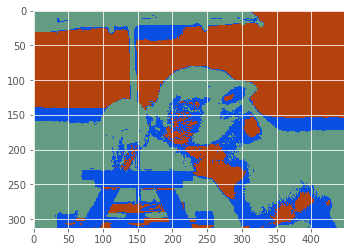

In [335]:
pic = read_img("/home/ruda/workspace/school/eksplo/list3/pig2.jpg")
simplified = simplify_picture(pic, 3)
plt.imshow(simplified)
plt.show()

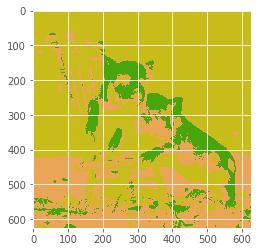

In [336]:
pic = read_img("/home/ruda/workspace/school/eksplo/list3/pig3.jpg")
simplified = simplify_picture(pic, 3)
plt.imshow(simplified)
plt.show()

In [340]:
data = map(lambda s: int(s), open("/home/ruda/workspace/school/eksplo/list3/kosarak.dat", 'r').read().split())
data_transactions = map(lambda s: s.split(' '), open("/home/ruda/workspace/school/eksplo/list3/kosarak.dat", 'r').read().split('\n'))
data_transactions = map(lambda l: map(lambda x: int(x), l), data_transactions[:-1])

def get_most_common(data, n):
    occurences = {}
    for i in data:
        if i in occurences:
            occurences[i] += 1
        else:
            occurences[i] = 1
    most_common = sorted(occurences.items(), key=lambda x: x[1], reverse=True)[:n]
    most_common = map(lambda x: x[0], most_common)
    return most_common

def bought_together(most_common, transactions):
    n = len(most_common)
    together = np.zeros((n, n))
    mapping = {most_common[i]: i for i in np.arange(n)}
    
    for i, transaction in enumerate(data_transactions):
        if (i % int(1e4) == 0):
            print('Processing transaction no.: ' + str(i))
        for i in np.arange(len(transaction)):
            for j in np.arange(i+1, len(transaction)):
                if transaction[i] in mapping and transaction[j] in mapping:
                    together[mapping[transaction[i]]][mapping[transaction[j]]] += 1
                    together[mapping[transaction[j]]][mapping[transaction[i]]] += 1
    return together
        

print(len(data_transactions))
#### for testing #####
data_transactions = data_transactions[:int(1e5)]
#### for testing - end #####
most_common = get_most_common(data, 1000)
together = bought_together(most_common, data_transactions)
results = kmeans(together, 20)
print(results[0])

# print(together)

990002
Processing transaction no.: 0
Processing transaction no.: 10000
Processing transaction no.: 20000
Processing transaction no.: 30000
Processing transaction no.: 40000
Processing transaction no.: 50000
Processing transaction no.: 60000
Processing transaction no.: 70000
Processing transaction no.: 80000
Processing transaction no.: 90000
[11 11 11  4  4  4  6  4  4  6  6  6  6  6  1  6  8  8  8  8  1  8  8  8  3
  8  3  8  1  3  8  8  8  8  8  8  8  8  3  8  3  8 16  9  1  1  9  3  9  1
  9  3  9  9  9  3  9 16  1  1  1  9  3  3  9  1 16  9  1  9  9  9  9  1  9
  9  9 16 10  1  9  1 17  9  9  1  9 17 17  9  9 10 17  9 16  9  9  1 17  9
 17 16 17 17  9 17 16 17  9 17  9 17  2 17 16  2 17 10  2  2  2 16  2 17 17
 17 17 17 17 16 17 17 17 17 17 16 16  5  5 16 17  9 17 17 17 17  5 17 16 17
 17 16 16 16 17 17 17 17 10 17 17  0 17 17 16 17 10 17 17 16 17 16 16 17 10
 17 16 10 16 17  0 17 17  0 17 10 16  0 16 10 17 17 16  0 17 17 10 17 17 10
 16 10  0 17  0  0  0 10 17  0 10 10  5 17 17  0 

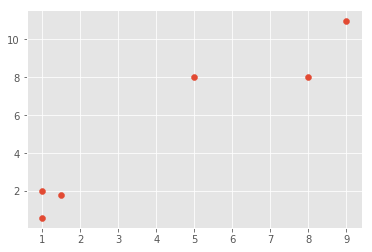

[[ 7.33333333  9.        ]
 [ 1.16666667  1.46666667]]
[1 0 1 0 1 0]
('coordinate:', array([ 1.,  2.]), 'label:', 1)
('coordinate:', array([ 5.,  8.]), 'label:', 0)
('coordinate:', array([ 1.5,  1.8]), 'label:', 1)
('coordinate:', array([ 8.,  8.]), 'label:', 0)
('coordinate:', array([ 1. ,  0.6]), 'label:', 1)
('coordinate:', array([  9.,  11.]), 'label:', 0)


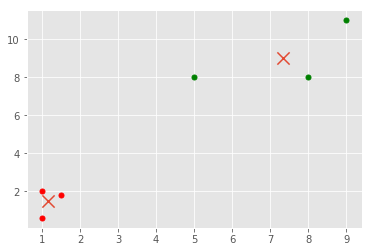

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

plt.scatter(x,y)
plt.show()

X = np.array([[1, 2],
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)
colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()